<a href="https://colab.research.google.com/github/Vishwak257/MLlab/blob/main/BL_EN_U4CSE21034.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

# Define the data
data = {
    'age': ['<=25', '<=25', '25…30', '>30', '>30', '>30', '261…30', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Display the dataset
print(df)

       age  income student credit_rating buys_computer
0     <=25    high      no          fair            no
1     <=25    high      no     excellent            no
2    25…30    high      no          fair           yes
3      >30  medium      no          fair           yes
4      >30     low     yes          fair           yes
5      >30     low     yes     excellent            no
6   261…30     low     yes     excellent           yes
7     <=30  medium      no          fair            no
8     <=30     low     yes          fair           yes
9      >40  medium     yes          fair           yes
10    <=30  medium     yes     excellent           yes
11   31…40  medium      no     excellent           yes
12   31…40    high     yes          fair           yes
13     >40  medium      no     excellent            no


In [ ]:
import pandas as pd
from math import log2

# Define the dataset
data = pd.DataFrame({
    'age': ['<=30', '<=30', '31-40', '>40', '>40', '>40', '31-40', '<=30', '<=30', '>40', '<=30', '31-40', '31-40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
})

def calculate_entropy(data):
    class_counts = data.value_counts(normalize=True)
    entropy = -sum(p * log2(p) for p in class_counts)
    return entropy

entropy_buys_computer = calculate_entropy(data['buys_computer'])
print(f'Entropy of "buys_computer": {entropy_buys_computer:.4f}')

# Calculate the entropy for each feature
feature_entropies = {}
for feature in data.columns[:-1]:  # Exclude the target variable 'buys_computer'
    unique_values = data[feature].unique()
    weighted_entropy = 0
    for value in unique_values:
        subset = data[data[feature] == value]
        entropy = calculate_entropy(subset['buys_computer'])
        weight = len(subset) / len(data)
        weighted_entropy += weight * entropy
    feature_entropies[feature] = weighted_entropy


print('\nEntropy for each feature at the root node:')
for feature, entropy in feature_entropies.items():
    print(f'{feature}: {entropy:.4f}')


Entropy of "buys_computer": 0.9403

Entropy for each feature at the root node:
age: 0.6935
income: 0.9111
student: 0.7042
credit_rating: 0.9371


In [ ]:
import pandas as pd
import math

# Load the dataset
data = {
    'age': ['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

# Calculate the entropy of the target variable 'buys_computer' at the root node
total_samples = len(df)
yes_count = len(df[df['buys_computer'] == 'yes'])
no_count = len(df[df['buys_computer'] == 'no'])

entropy_root = 0

if yes_count > 0:
    p_yes = yes_count / total_samples
    entropy_root -= p_yes * math.log2(p_yes)

if no_count > 0:
    p_no = no_count / total_samples
    entropy_root -= p_no * math.log2(p_no)

# Calculate Information Gain for each feature
def calculate_entropy(attribute):
    entropy = 0
    attribute_counts = df.groupby(attribute)['buys_computer'].value_counts()
    total_samples = len(df)

    for value, count in attribute_counts.items():
        value_samples = len(df[df[attribute] == value[0]])
        p_value = value_samples / total_samples
        p_class = count / value_samples
        entropy -= p_value * p_class * math.log2(p_class)

    return entropy

information_gain = {}
for feature in df.columns[:-1]:  # Exclude the target variable
    entropy_feature = calculate_entropy(feature)
    information_gain[feature] = entropy_root - entropy_feature

# Identify the feature with the highest Information Gain as the root node
root_node = max(information_gain, key=information_gain.get)

print("Entropy at root node:", entropy_root)

print("\nInformation Gain for each feature:")
for feature, ig in information_gain.items():
    print(f"{feature}: {ig}")

print("The first feature to select for the decision tree:", root_node)

Entropy at root node: 0.9402859586706311

Information Gain for each feature:
age: 0.24674981977443933
income: 0.02922256565895487
student: 0.15183550136234159
credit_rating: 0.0481270304082696
The first feature to select for the decision tree: age


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = {
    'age': ['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

# Separate the features (X) and the target variable (y)
X = df.drop('buys_computer', axis=1)
y = df['buys_computer']

# Perform one-hot encoding on the categorical features
X_encoded = pd.get_dummies(X, columns=['age', 'income', 'student', 'credit_rating'])

# Create and train the Decision Tree model
model = DecisionTreeClassifier()
model.fit(X_encoded, y)

# Get the training set accuracy
training_accuracy = model.score(X_encoded, y)
print("Training Set Accuracy:", training_accuracy)

# Get the depth of the constructed tree
tree_depth = model.get_depth()
print("Tree Depth:", tree_depth)

Training Set Accuracy: 1.0
Tree Depth: 4


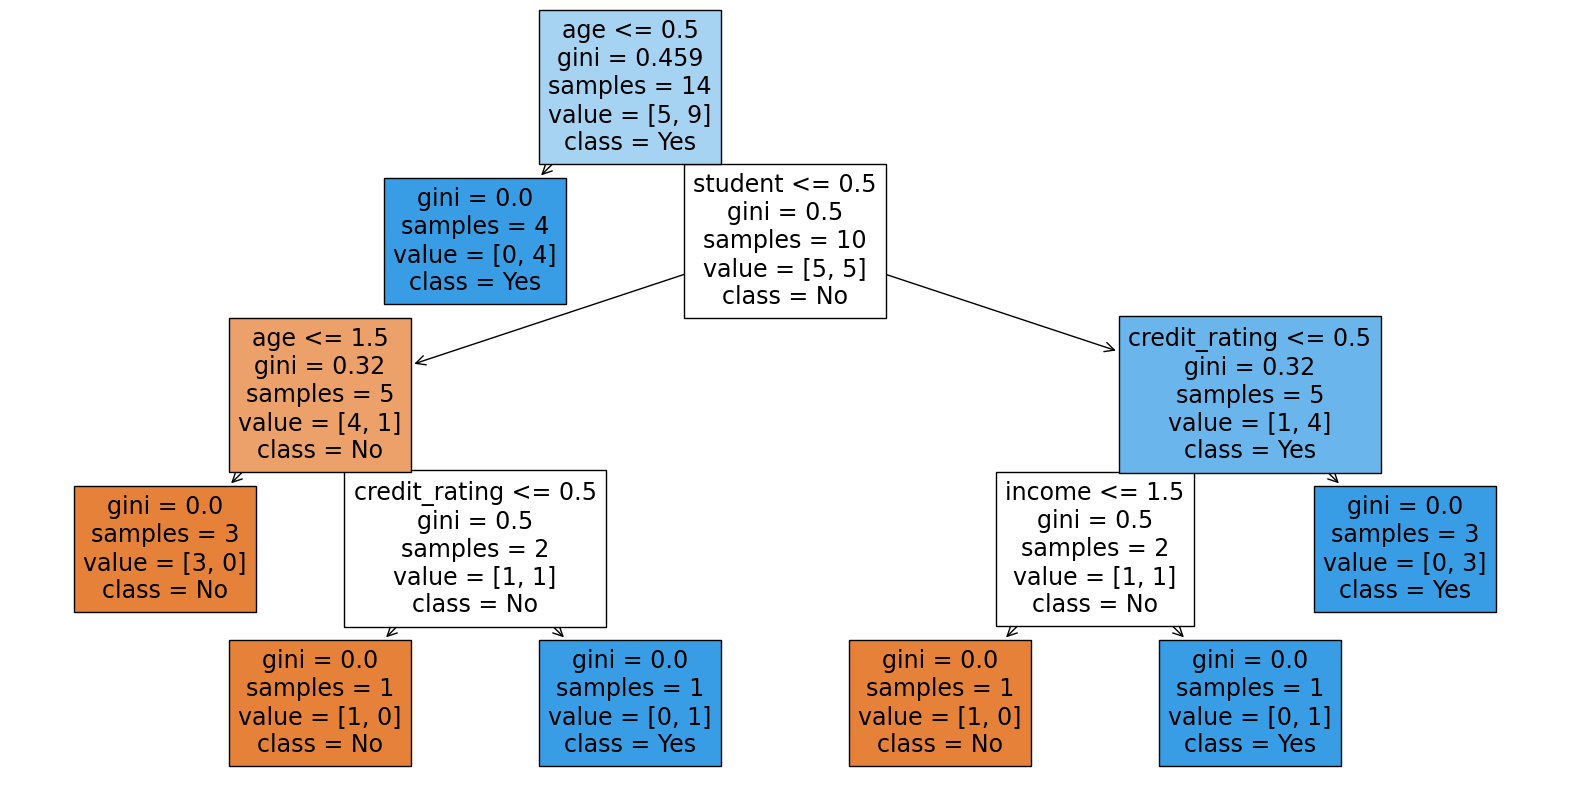

In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn import tree

# Define the dataset as you provided
data = {
    'age': ['<=30', '<=30', '31…40', '>40', '>40', '>40', '31…40', '<=30', '<=30', '>40', '<=30', '31…40', '31…40', '>40'],
    'income': ['high', 'high', 'high', 'medium', 'low', 'low', 'low', 'medium', 'low', 'medium', 'medium', 'medium', 'high', 'medium'],
    'student': ['no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no'],
    'credit_rating': ['fair', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'fair', 'fair', 'excellent', 'excellent', 'fair', 'excellent'],
    'buys_computer': ['no', 'no', 'yes', 'yes', 'yes', 'no', 'yes', 'no', 'yes', 'yes', 'yes', 'yes', 'yes', 'no']
}

df = pd.DataFrame(data)

# Encode categorical features
le = LabelEncoder()
for col in df.columns:
    df[col] = le.fit_transform(df[col])

# Define features and target variable
X = df.drop('buys_computer', axis=1)
y = df['buys_computer']

# Create and fit the decision tree model
model = DecisionTreeClassifier()
model.fit(X, y)

# Visualize the decision tree
plt.figure(figsize=(20, 10))
tree.plot_tree(model, filled=True, feature_names=list(df.columns[:-1]), class_names=['No', 'Yes'])
plt.show()


In [ ]:
import numpy as np
import pandas as pd
df=pd.read_excel("/content/DS to outputfinal.xlsx")
df

#In[8]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree


# Separate features (X) and target (y)
X = df[['Id', 'Label']]
y = df['Label']

# Split the data into training and test sets (70% training, 30% test)
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier
model = DecisionTreeClassifier()

# Fit the model on the training data
model.fit(Tr_X, Tr_y)

# Training Set accuracy
train_accuracy = model.score(Tr_X, Tr_y)

# Test Set Accuracy
test_accuracy = model.score(Te_X, Te_y)

print(f"Training Set Accuracy: {train_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")
class_names = df['Label'].unique().astype(str).tolist()
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=['embed_1', 'embed_2'], class_names=class_names)
plt.title("Decision Tree")
plt.show()


FileNotFoundError: ignored

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
X = df[['target_text']
y = df['target_text']
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier with max_depth constraint
model = DecisionTreeClassifier(max_depth=5)

# Fit the model on the training data
model.fit(Tr_X, Tr_y)

# Training Set accuracy
train_accuracy = model.score(Tr_X, Tr_y)

# Test Set Accuracy
test_accuracy = model.score(Te_X, Te_y)

print(f"Training Set Accuracy: {train_accuracy}")
print(f"Test Set Accuracy: {test_accuracy}")

# Convert class labels to strings
class_names = df['Label'].unique().astype(str).tolist()

# Plot the Decision Tree with max_depth constraint
plt.figure(figsize=(10, 6))
plot_tree(model, filled=True, feature_names=['embed_1', 'embed_2'], class_names=class_names)
plt.title("Decision Tree with max_depth=5")
plt.show()

SyntaxError: ignored

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree



# Separate features (X) and target (y)
X = df[['Id', 'Label']]
y = df['Label']
# Split the data into training and test sets (70% training, 30% test)
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a Decision Tree classifier with entropy criterion
model_entropy = DecisionTreeClassifier(criterion="entropy")

# Fit the model on the training data
model_entropy.fit(Tr_X, Tr_y)

# Training Set accuracy with entropy criterion
train_accuracy_entropy = model_entropy.score(Tr_X, Tr_y)

# Test Set Accuracy with entropy criterion
test_accuracy_entropy = model_entropy.score(Te_X, Te_y)

print(f"Training Set Accuracy (Entropy Criterion): {train_accuracy_entropy}")
print(f"Test Set Accuracy (Entropy Criterion): {test_accuracy_entropy}")

# Convert class labels to strings
class_names = df['Label'].unique().astype(str).tolist()


# Plot the Decision Tree with entropy criterion
plt.figure(figsize=(10, 6))
plot_tree(model_entropy, filled=True, feature_names=['embed_1', 'embed_2'], class_names=class_names)
plt.title("Decision Tree with Entropy Criterion")
plt.show()

KeyError: ignored

In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix



# Separate features (X) and target (y)
X = df[['Id', 'Label']]
y = df['Label']

# Split the data into training and test sets (70% training, 30% test)
Tr_X, Te_X, Tr_y, Te_y = train_test_split(X, y, test_size=0.3, random_state=42)

# Create a single Decision Tree classifier
model_decision_tree = DecisionTreeClassifier()
model_decision_tree.fit(Tr_X, Tr_y)

# Predict using the Decision Tree model
y_pred_decision_tree = model_decision_tree.predict(Te_X)

# Calculate accuracy and print metrics for the Decision Tree
accuracy_decision_tree = accuracy_score(Te_y, y_pred_decision_tree)
confusion_matrix_decision_tree = confusion_matrix(Te_y, y_pred_decision_tree)
classification_report_decision_tree = classification_report(Te_y, y_pred_decision_tree)

print("Performance Metrics for Single Decision Tree:")
print(f"Accuracy: {accuracy_decision_tree}")
print("Confusion Matrix:")
print(confusion_matrix_decision_tree)
print("Classification Report:")
print(classification_report_decision_tree)

# Create a Random Forest classifier
model_random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
model_random_forest.fit(Tr_X, Tr_y)

# Predict using the Random Forest model
y_pred_random_forest = model_random_forest.predict(Te_X)

# Calculate accuracy and print metrics for the Random Forest
accuracy_random_forest = accuracy_score(Te_y, y_pred_random_forest)
confusion_matrix_random_forest = confusion_matrix(Te_y, y_pred_random_forest)
classification_report_random_forest = classification_report(Te_y, y_pred_random_forest)

print("\nPerformance Metrics for Random Forest:")
print(f"Accuracy: {accuracy_random_forest}")
print("Confusion Matrix:")
print(confusion_matrix_random_forest)
print("Classification Report:")
print(classification_report_random_forest)

KeyError: ignored

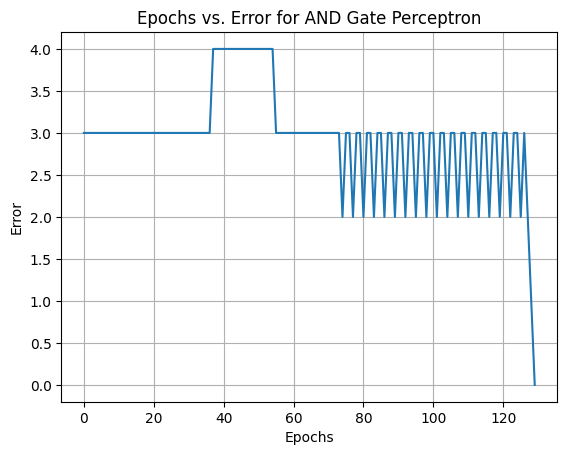

Learned Weights: W0 = -0.10000000000000765, W1 = 0.1000000000000001, W2 = 0.05000000000000032


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# AND gate input
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# AND gate output
y = np.array([0, 0, 0, 1])

# weights and bias
W0, W1, W2 = 10, 0.2, -0.75
learning_rate = 0.05

#  Step activation function
def step_activation(z):
    return 1 if z >= 0 else 0

#  variables for tracking epochs and errors
epochs = 0
errors = []

while True:
    error_sum = 0
    for i in range(len(X)):
        xi = X[i]
        target = y[i]

        # weighted sum
        z = W0 + W1 * xi[0] + W2 * xi[1]

        #  predicted output
        predicted = step_activation(z)

        #  the error
        error = target - predicted
        error_sum += error ** 2

        # Update weights and bias
        W0 += learning_rate * error
        W1 += learning_rate * error * xi[0]
        W2 += learning_rate * error * xi[1]

    epochs += 1
    errors.append(error_sum)

    # Check for convergence condition or maximum epochs
    if error_sum <= 0.002 or epochs >= 1000:
        break

# Plot epochs vs. error values
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs. Error for AND Gate Perceptron')
plt.grid(True)
plt.show()

# Print the learned weights and bias
print(f"Learned Weights: W0 = {W0}, W1 = {W1}, W2 = {W2}")

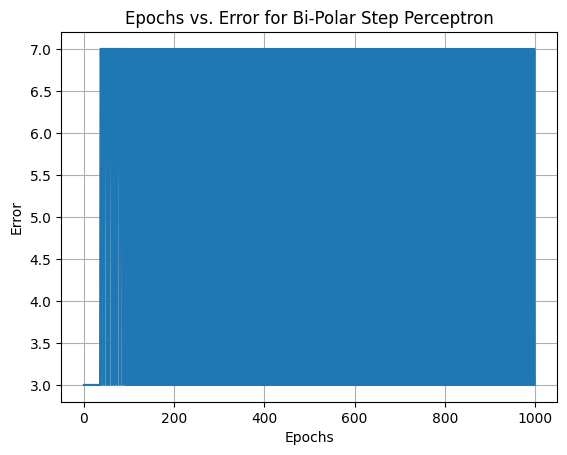

Learned Weights: W0 = -0.0999999999999975, W1 = 0.09999999999999902, W2 = 0.05000000000000643


In [2]:
import numpy as np
import matplotlib.pyplot as plt

# AND gate input
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# AND gate output
y = np.array([0, 0, 0, 1])

#  weights and bias
W0, W1, W2 = 10, 0.2, -0.75
learning_rate = 0.05

# Bi-Polar Step activation function
def bipolar_step_activation(z):
    return 1 if z > 0 else -1

#  variables for tracking epochs and errors
epochs = 0
errors = []

while True:
    error_sum = 0
    for i in range(len(X)):
        xi = X[i]
        target = y[i]

        #  weighted sum
        z = W0 + W1 * xi[0] + W2 * xi[1]

        #  predicted output
        predicted = bipolar_step_activation(z)

        #  the error
        error = target - predicted
        error_sum += error ** 2

        # Update weights and bias
        W0 += learning_rate * error
        W1 += learning_rate * error * xi[0]
        W2 += learning_rate * error * xi[1]

    epochs += 1
    errors.append(error_sum)

    # Check for convergence condition or maximum epochs
    if error_sum <= 0.002 or epochs >= 1000:
        break

# Plot epochs vs. error values
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs. Error for Bi-Polar Step Perceptron')
plt.grid(True)
plt.show()

# Print the learned weights and bias
print(f"Learned Weights: W0 = {W0}, W1 = {W1}, W2 = {W2}")



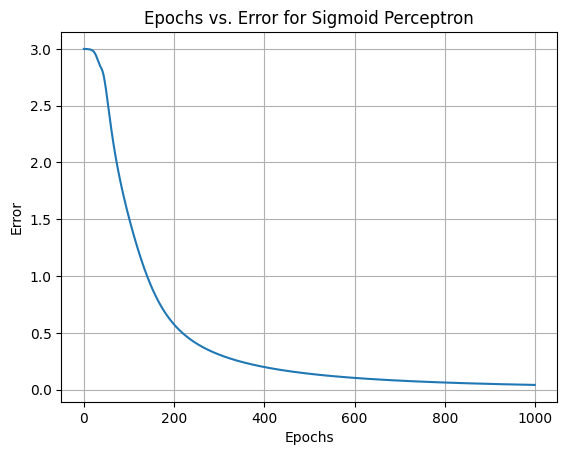

Learned Weights: W0 = -6.1353130787344305, W1 = 3.970833206406072, W2 = 3.963948347259991


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# AND gate input
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# AND gate output
y = np.array([0, 0, 0, 1])

#  weights and bias
W0, W1, W2 = 10, 0.2, -0.75
learning_rate = 0.05

#  Sigmoid activation function
def sigmoid_activation(z):
    return 1 / (1 + np.exp(-z))

#  variables for tracking epochs and errors
epochs = 0
errors = []

while True:
    error_sum = 0
    for i in range(len(X)):
        xi = X[i]
        target = y[i]

        #  the weighted sum
        z = W0 + W1 * xi[0] + W2 * xi[1]

        #  the predicted output
        predicted = sigmoid_activation(z)

        #  the error
        error = target - predicted
        error_sum += error ** 2

        # Update weights and bias
        W0 += learning_rate * error
        W1 += learning_rate * error * xi[0]
        W2 += learning_rate * error * xi[1]

    epochs += 1
    errors.append(error_sum)

    # Check for convergence condition or maximum epochs
    if error_sum <= 0.002 or epochs >= 1000:
        break

# Plot epochs vs. error values
plt.plot(range(epochs), errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.title('Epochs vs. Error for Sigmoid Perceptron')
plt.grid(True)
plt.show()

# Print the learned weights and bias
print(f"Learned Weights: W0 = {W0}, W1 = {W1}, W2 = {W2}")


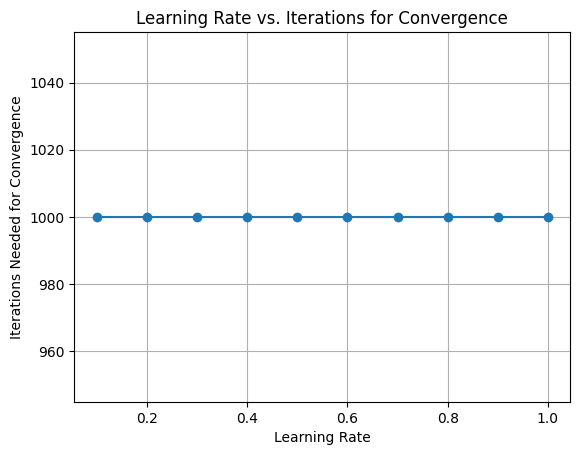

Learning Rate 0.1: Iterations Needed = 1000
Learning Rate 0.2: Iterations Needed = 1000
Learning Rate 0.3: Iterations Needed = 1000
Learning Rate 0.4: Iterations Needed = 1000
Learning Rate 0.5: Iterations Needed = 1000
Learning Rate 0.6: Iterations Needed = 1000
Learning Rate 0.7: Iterations Needed = 1000
Learning Rate 0.8: Iterations Needed = 1000
Learning Rate 0.9: Iterations Needed = 1000
Learning Rate 1: Iterations Needed = 1000


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# AND gate input
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# AND gate output
y = np.array([0, 0, 0, 1])

#  weights and bias
W0, W1, W2 = 10, 0.2, -0.75

#  Bi-Polar Step activation function
def bipolar_step_activation(z):
    return 1 if z > 0 else -1

# List of learning rates to test
learning_rates = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]

#  a list to store the number of iterations for each learning rate
iterations_needed = []

for learning_rate in learning_rates:
    W0, W1, W2 = 10, 0.2, -0.75

    #  variables for tracking epochs and errors
    epochs = 0

    while True:
        error_sum = 0
        for i in range(len(X)):
            xi = X[i]
            target = y[i]

            #  weighted sum
            z = W0 + W1 * xi[0] + W2 * xi[1]

            #  predicted output
            predicted = bipolar_step_activation(z)

            #  error
            error = target - predicted
            error_sum += error ** 2

            #  weights and bias
            W0 += learning_rate * error
            W1 += learning_rate * error * xi[0]
            W2 += learning_rate * error * xi[1]

        epochs += 1

        # Check for convergence condition or maximum epochs
        if error_sum <= 0.002 or epochs >= 1000:
            break

    iterations_needed.append(epochs)

# Plot learning rates vs. iterations needed
plt.plot(learning_rates, iterations_needed, marker='o')
plt.xlabel('Learning Rate')
plt.ylabel('Iterations Needed for Convergence')
plt.title('Learning Rate vs. Iterations for Convergence')
plt.grid(True)
plt.show()

# Print the number of iterations needed for each learning rate
for i, rate in enumerate(learning_rates):
    print(f"Learning Rate {rate}: Iterations Needed = {iterations_needed[i]}")


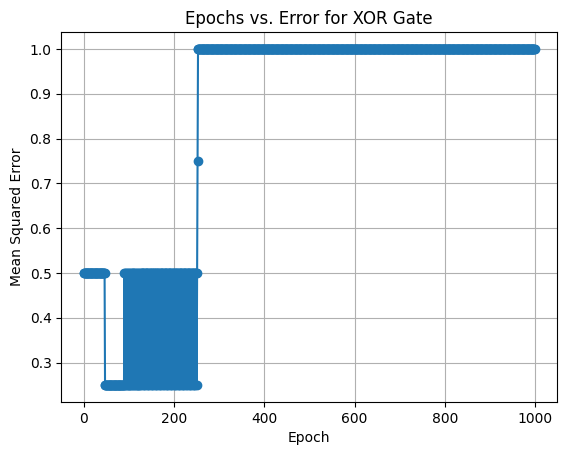

Converged Weights:
W0 = 0.09999999999999236
W1 = -0.09999999999999969
W2 = -0.09999999999999969


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# XOR gate input
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# XOR gate output
y_xor = np.array([0, 1, 1, 0])

#  weights and bias
W0, W1, W2 = 10, 0.2, -0.75
alpha = 0.05

# Max number of epochs
max_epochs = 1000

# Lists to store epoch and error values
epochs = []
errors = []

for epoch in range(max_epochs):
    error_sum = 0.0
    for i in range(len(X_xor)):
        # Calculate the weighted sum
        weighted_sum = W0 + W1 * X_xor[i][0] + W2 * X_xor[i][1]

        # Apply Step activation function
        if weighted_sum > 0:
            prediction = 1
        else:
            prediction = 0

        error = y_xor[i] - prediction

        # Update weights and bias
        W0 += alpha * error
        W1 += alpha * error * X_xor[i][0]
        W2 += alpha * error * X_xor[i][1]

        # Add squared error to the sum
        error_sum += error ** 2

    # Append epoch and error values for plotting
    epochs.append(epoch)
    errors.append(error_sum / len(X_xor))

    # Check for convergence
    if error_sum / len(X_xor) <= 0.002:
        break

# Plot epochs against error values
plt.plot(epochs, errors, marker='o', linestyle='-')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Epochs vs. Error for XOR Gate')
plt.grid(True)
plt.show()

# Print the converged weights
print("Converged Weights:")
print("W0 =", W0)
print("W1 =", W1)
print("W2 =", W2)

Bi-Polar Step Activation Converged in 1000 epochs


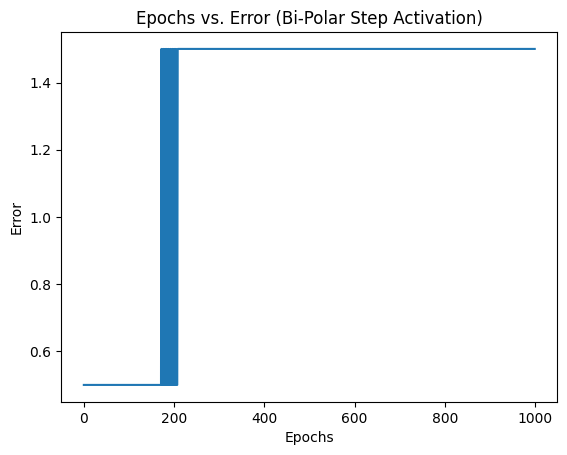

Converged Weights:
W0 = 0.1999999999999919
W1 = -0.09999999999999969
W2 = -0.15000000000000013


In [7]:
import numpy as np
import matplotlib.pyplot as plt

# XOR gate input data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# XOR gate output data
y_xor = np.array([0, 1, 1, 0])

# Initialize weights and bias
W0, W1, W2 = 10, 0.2, -0.75

# Learning rate
alpha = 0.05

# Maximum number of epochs
max_epochs = 1000

# Lists to store epoch and error values
epochs = []
errors = []

for epoch in range(max_epochs):
    error_sum = 0.0
    for i in range(len(X_xor)):
        # Calculate the weighted sum
        weighted_sum = W0 + W1 * X_xor[i][0] + W2 * X_xor[i][1]

        # Apply Bi-Polar Step activation function
        if weighted_sum > 0:
            prediction = 1
        else:
            prediction = -1

        # Calculate error
        error = y_xor[i] - prediction

        # Update weights and bias
        W0 += alpha * error
        W1 += alpha * error * X_xor[i][0]
        W2 += alpha * error * X_xor[i][1]

        # Add squared error to the sum
        error_sum += error ** 2

    # Append epoch and error values for plotting
    epochs.append(epoch)
    errors.append(error_sum / len(X_xor))

    # Check for convergence
    if error_sum / len(X_xor) <= 0.002:
        break

# Print the number of epochs needed for convergence
print("Bi-Polar Step Activation Converged in", epoch + 1, "epochs")

# Plot epochs against error values
plt.plot(epochs, errors)
plt.title('Epochs vs. Error (Bi-Polar Step Activation)')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# Print the converged weights
print("Converged Weights:")
print("W0 =", W0)
print("W1 =", W1)
print("W2 =", W2)

Sigmoid Activation Converged in 1000 epochs


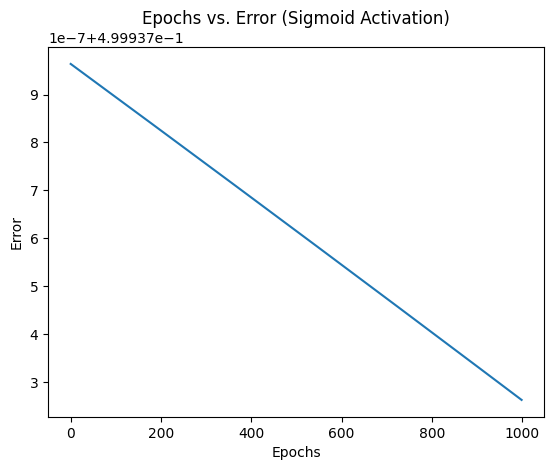

Converged Weights:
W0 = 9.993762331593638
W1 = 0.19603862458869564
W2 = -0.753960978725144


In [8]:
import numpy as np
import matplotlib.pyplot as plt

# XOR gate input data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# XOR gate output data
y_xor = np.array([0, 1, 1, 0])

# Initialize weights and bias
W0, W1, W2 = 10, 0.2, -0.75

# Learning rate
alpha = 0.05

# Maximum number of epochs
max_epochs = 1000

# Lists to store epoch and error values
epochs = []
errors = []

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

for epoch in range(max_epochs):
    error_sum = 0.0
    for i in range(len(X_xor)):
        # Calculate the weighted sum
        weighted_sum = W0 + W1 * X_xor[i][0] + W2 * X_xor[i][1]

        # Apply Sigmoid activation function
        prediction = sigmoid(weighted_sum)

        # Calculate error
        error = y_xor[i] - prediction

        # Update weights and bias
        delta = alpha * error * prediction * (1 - prediction)
        W0 += delta
        W1 += delta * X_xor[i][0]
        W2 += delta * X_xor[i][1]

        # Add squared error to the sum
        error_sum += error ** 2

    # Append epoch and error values for plotting
    epochs.append(epoch)
    errors.append(error_sum / len(X_xor))

    # Check for convergence
    if error_sum / len(X_xor) <= 0.002:
        break

# Print the number of epochs needed for convergence
print("Sigmoid Activation Converged in", epoch + 1, "epochs")

# Plot epochs against error values
plt.plot(epochs, errors)
plt.title('Epochs vs. Error (Sigmoid Activation)')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# Print the converged weights
print("Converged Weights:")
print("W0 =", W0)
print("W1 =", W1)
print("W2 =", W2)

ReLU Activation Converged in 1000 epochs


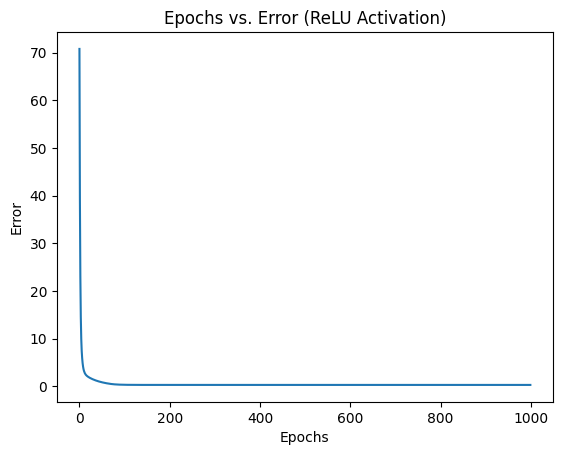

Converged Weights:
W0 = 0.526315789473727
W1 = -0.052631578947401975
W2 = -0.02631578947371866


In [9]:
import numpy as np
import matplotlib.pyplot as plt

# XOR gate input data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
# XOR gate output data
y_xor = np.array([0, 1, 1, 0])

# Initialize weights and bias
W0, W1, W2 = 10, 0.2, -0.75

# Learning rate
alpha = 0.05

# Maximum number of epochs
max_epochs = 1000

# Lists to store epoch and error values
epochs = []
errors = []

# ReLU activation function
def relu(x):
    return max(0, x)

for epoch in range(max_epochs):
    error_sum = 0.0
    for i in range(len(X_xor)):
        # Calculate the weighted sum
        weighted_sum = W0 + W1 * X_xor[i][0] + W2 * X_xor[i][1]

        # Apply ReLU activation function
        prediction = relu(weighted_sum)

        # Calculate error
        error = y_xor[i] - prediction

        # Update weights and bias
        delta = alpha * error
        W0 += delta
        W1 += delta * X_xor[i][0]
        W2 += delta * X_xor[i][1]

        # Add squared error to the sum
        error_sum += error ** 2

    # Append epoch and error values for plotting
    epochs.append(epoch)
    errors.append(error_sum / len(X_xor))

    # Check for convergence
    if error_sum / len(X_xor) <= 0.002:
        break

# Print the number of epochs needed for convergence
print("ReLU Activation Converged in", epoch + 1, "epochs")

# Plot epochs against error values
plt.plot(epochs, errors)
plt.title('Epochs vs. Error (ReLU Activation)')
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

# Print the converged weights
print("Converged Weights:")
print("W0 =", W0)
print("W1 =", W1)
print("W2 =", W2)

In [13]:
import numpy as np

# Initialize weights and bias with random values
W_candies, W_mangoes, W_milk_packets, bias = np.random.rand(4)

# Learning rate
alpha = 0.1

# Sigmoid activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Input features (Candies, Mangoes, Milk Packets)
X = np.array([
    [20, 6, 1],
    [16, 3, 2],
    [27, 9, 3],
    [19, 11, 0],
    [24, 8, 2],
    [15, 12, 1],
    [15, 4, 2],
    [18, 8, 2],
    [21, 1, 4],
    [24, 19, 8]
])

# Corresponding target labels (High Value Tx)
y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Training the perceptron
for _ in range(1000):  # Adjust the number of epochs as needed
    total_error = 0
    for i in range(len(X)):
        # Compute the weighted sum of inputs
        weighted_sum = (
            W_candies * X[i][0] +
            W_mangoes * X[i][1] +
            W_milk_packets * X[i][2] +
            bias
        )

        # Apply sigmoid activation function
        prediction = sigmoid(weighted_sum)

        # Calculate the error
        error = y[i] - prediction
        total_error += error ** 2

        # Update weights and bias
        W_candies += alpha * error * prediction * (1 - prediction) * X[i][0]
        W_mangoes += alpha * error * prediction * (1 - prediction) * X[i][1]
        W_milk_packets += alpha * error * prediction * (1 - prediction) * X[i][2]
        bias += alpha * error

    # Check for convergence (adjust the error threshold as needed)
    if total_error < 0.01:
        break

# Classify new data point
def classify(candies, mangoes, milk_packets):
    weighted_sum = (
        W_candies * candies +
        W_mangoes * mangoes +
        W_milk_packets * milk_packets +
        bias
    )
    prediction = sigmoid(weighted_sum)
    return "High Value" if prediction >= 0.5 else "Low Value"

# Example
new_transaction = [0.3, 0.1, 0.4]
result = classify(*new_transaction)
print(f"New transaction {new_transaction} is classified as {result}")


New transaction [0.3, 0.1, 0.4] is classified as Low Value


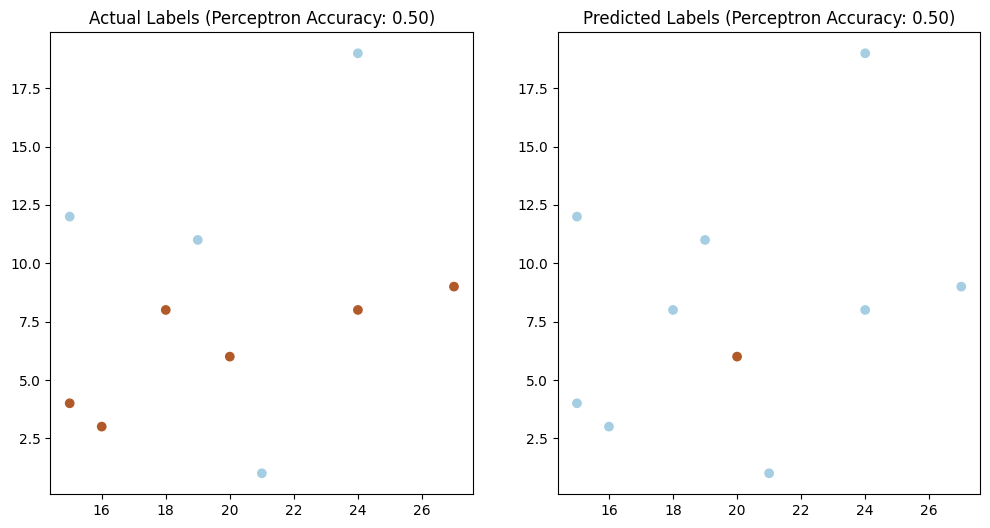

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Input features (Candies, Mangoes, Milk Packets)
X = np.array([
    [20, 6, 1],
    [16, 3, 2],
    [27, 9, 3],
    [19, 11, 0],
    [24, 8, 2],
    [15, 12, 1],
    [15, 4, 2],
    [18, 8, 2],
    [21, 1, 4],
    [24, 19, 8]
])

# Corresponding target labels (High Value Tx)
y = np.array([1, 1, 1, 0, 1, 0, 1, 1, 0, 0])

# Create and train a perceptron model
class Perceptron:
    def __init__(self, learning_rate=0.05, n_iterations=1000):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iterations):
            for i in range(n_samples):
                linear_output = np.dot(X[i], self.weights) + self.bias
                prediction = self.step_function(linear_output)

                # Update weights and bias
                self.weights += self.learning_rate * (y[i] - prediction) * X[i]
                self.bias += self.learning_rate * (y[i] - prediction)

    def step_function(self, x):
        return 1 if x >= 0 else 0

    def predict(self, X):
        predictions = []
        for i in range(X.shape[0]):
            linear_output = np.dot(X[i], self.weights) + self.bias
            predictions.append(self.step_function(linear_output))
        return np.array(predictions)

perceptron = Perceptron()
perceptron.fit(X, y)

# Create and train a logistic regression model
logistic_regression = LogisticRegression(solver='lbfgs')
logistic_regression.fit(X, y)

# Generate predictions for each transaction
perceptron_predictions = perceptron.predict(X)
logistic_regression_predictions = logistic_regression.predict(X)

# Calculate accuracy for both models
perceptron_accuracy = accuracy_score(y, perceptron_predictions)
logistic_regression_accuracy = accuracy_score(y, logistic_regression_predictions)

# Plot transactions with actual and predicted labels
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.title(f'Actual Labels (Perceptron Accuracy: {perceptron_accuracy:.2f})')

plt.subplot(1, 2, 2)
plt.scatter(X[:, 0], X[:, 1], c=perceptron_predictions, cmap=plt.cm.Paired)
plt.title(f'Predicted Labels (Perceptron Accuracy: {perceptron_accuracy:.2f})')

plt.show()

In [16]:
import numpy as np

# AND gate input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# AND gate output data
y = np.array([0, 0, 0, 1])

# Initialize weights and biases
np.random.seed(0)
input_size = 2
hidden_size = 2
output_size = 1

# Weights and biases for the input layer to the hidden layer
W1 = np.random.uniform(size=(input_size, hidden_size))
b1 = np.zeros(hidden_size)

# Weights and biases for the hidden layer to the output layer
W2 = np.random.uniform(size=(hidden_size, output_size))
b2 = np.zeros(output_size)

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Hyperparameters
learning_rate = 0.05
max_iterations = 1000
convergence_error = 0.002

# Training the neural network
for i in range(max_iterations):
    # Forward propagation
    layer1_input = np.dot(X, W1) + b1
    layer1_output = sigmoid(layer1_input)

    layer2_input = np.dot(layer1_output, W2) + b2
    layer2_output = sigmoid(layer2_input)

    # Calculate error
    error = y.reshape(-1, 1) - layer2_output

    # Backpropagation
    delta2 = error * sigmoid_derivative(layer2_output)
    dW2 = np.dot(layer1_output.T, delta2)
    db2 = np.sum(delta2, axis=0)

    delta1 = np.dot(delta2, W2.T) * sigmoid_derivative(layer1_output)
    dW1 = np.dot(X.T, delta1)
    db1 = np.sum(delta1, axis=0)

    # Update weights and biases
    W2 += learning_rate * dW2
    b2 += learning_rate * db2
    W1 += learning_rate * dW1
    b1 += learning_rate * db1

    # Calculate mean squared error
    mse = np.mean(np.square(error))

    # Check for convergence
    if mse <= convergence_error:
        print(f"Converged after {i + 1} iterations with MSE: {mse:.6f}")
        break

# Testing the trained neural network
test_data = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
predicted_output = sigmoid(np.dot(sigmoid(np.dot(test_data, W1) + b1), W2) + b2)
predicted_labels = (predicted_output > 0.5).astype(int)

print("Test Data:")
print(test_data)
print("Predicted Labels:")
print(predicted_labels)


Test Data:
[[1 1]
 [1 0]
 [0 1]
 [0 0]]
Predicted Labels:
[[0]
 [0]
 [0]
 [0]]


In [17]:
import numpy as np

# XOR gate input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# XOR gate output data
y = np.array([[0], [1], [1], [0]])

# Hyperparameters
learning_rate = 0.05
input_size = 2
hidden_size = 2
output_size = 1
max_iterations = 10000
convergence_error = 0.002

# Initialize weights with small random values
np.random.seed(0)
W1 = 2 * np.random.random((input_size, hidden_size)) - 1
W2 = 2 * np.random.random((hidden_size, output_size)) - 1

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training the neural network using backpropagation
for i in range(max_iterations):
    # Forward propagation
    layer1_input = np.dot(X, W1)
    layer1_output = sigmoid(layer1_input)

    layer2_input = np.dot(layer1_output, W2)
    layer2_output = sigmoid(layer2_input)

    # Calculate errors
    error2 = y - layer2_output
    error2_delta = error2 * sigmoid_derivative(layer2_output)

    error1 = error2_delta.dot(W2.T)
    error1_delta = error1 * sigmoid_derivative(layer1_output)

    # Update weights
    W2 += layer1_output.T.dot(error2_delta) * learning_rate
    W1 += X.T.dot(error1_delta) * learning_rate

    # Calculate mean squared error
    mse = np.mean(np.square(error2))

    # Check for convergence
    if mse <= convergence_error:
        print(f"Converged after {i + 1} iterations with MSE: {mse:.6f}")
        break

# Testing the trained neural network
test_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
predicted_output = sigmoid(np.dot(sigmoid(np.dot(test_data, W1)), W2))
predicted_labels = (predicted_output > 0.5).astype(int)

print("Test Data:")
print(test_data)
print("Predicted Labels:")
print(predicted_labels)


Test Data:
[[0 0]
 [0 1]
 [1 0]
 [1 1]]
Predicted Labels:
[[0]
 [0]
 [1]
 [1]]


In [19]:
import numpy as np

# XOR gate input data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])

# XOR gate output data (two nodes for each output)
y = np.array([[1, 0], [0, 1], [0, 1], [1, 0]])

# Hyperparameters
learning_rate = 0.05
input_size = 2
hidden_size = 2
output_size = 2  # Two output nodes
max_iterations = 10000
convergence_error = 0.002

# Initialize weights with small random values
np.random.seed(0)
W1 = 2 * np.random.random((input_size, hidden_size)) - 1
W2 = 2 * np.random.random((hidden_size, output_size)) - 1

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

# Training the neural network using backpropagation
for i in range(max_iterations):
    # Forward propagation
    layer1_input = np.dot(X, W1)
    layer1_output = sigmoid(layer1_input)

    layer2_input = np.dot(layer1_output, W2)
    layer2_output = sigmoid(layer2_input)

    # Calculate errors
    error2 = y - layer2_output
    error2_delta = error2 * sigmoid_derivative(layer2_output)

    error1 = error2_delta.dot(W2.T)
    error1_delta = error1 * sigmoid_derivative(layer1_output)

    # Update weights
    W2 += layer1_output.T.dot(error2_delta) * learning_rate
    W1 += X.T.dot(error1_delta) * learning_rate

    # Calculate mean squared error
    mse = np.mean(np.square(error2))

    # Check for convergence
    if mse <= convergence_error:
        print(f"Converged after {i + 1} iterations with MSE: {mse:.6f}")
        break

# Testing the trained neural network
test_data = np.array([[1, 1], [1, 0], [0, 1], [0, 0]])
predicted_output = sigmoid(np.dot(sigmoid(np.dot(test_data, W1)), W2))
predicted_labels = (predicted_output > 0.5).astype(int)

print("Test Data:")
print(test_data)
print("Predicted Labels:")
print(predicted_labels)


Test Data:
[[1 1]
 [1 0]
 [0 1]
 [0 0]]
Predicted Labels:
[[0 1]
 [0 1]
 [0 0]
 [0 0]]


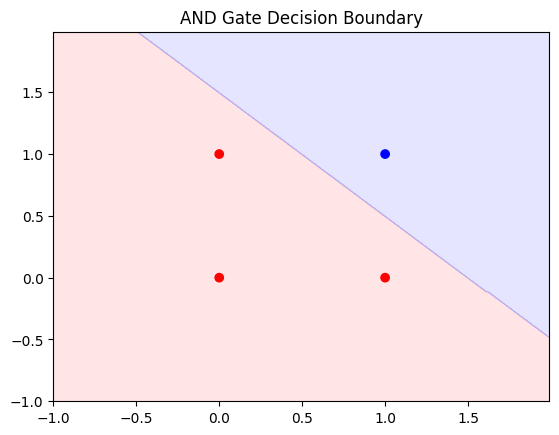

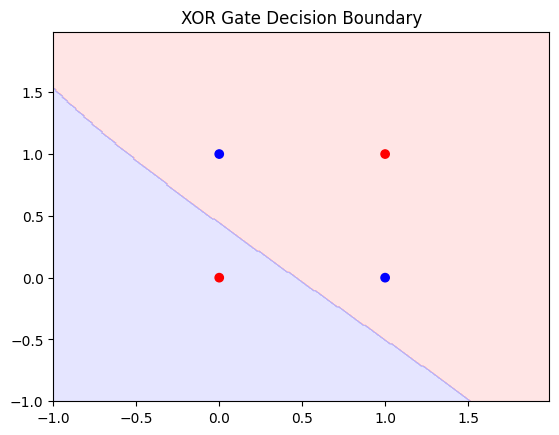

AND Gate Accuracy: 1.0
XOR Gate Accuracy: 0.25


In [20]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
from matplotlib.colors import ListedColormap

# Define the AND gate input and output data
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Define the XOR gate input and output data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Create an MLPClassifier for the AND gate
and_classifier = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd', learning_rate_init=0.1, max_iter=10000)

# Create an MLPClassifier for the XOR gate
xor_classifier = MLPClassifier(hidden_layer_sizes=(2,), activation='logistic', solver='sgd', learning_rate_init=0.1, max_iter=10000)

# Train the AND gate classifier
and_classifier.fit(X_and, y_and)

# Train the XOR gate classifier
xor_classifier.fit(X_xor, y_xor)

# Predict for AND gate inputs
and_predictions = and_classifier.predict(X_and)

# Predict for XOR gate inputs
xor_predictions = xor_classifier.predict(X_xor)

# Confusion matrix for AND gate
cm_and = confusion_matrix(y_and, and_predictions)

# Confusion matrix for XOR gate
cm_xor = confusion_matrix(y_xor, xor_predictions)

# Define a function to plot the decision boundary
def plot_decision_boundary(classifier, X, y, title):
    cmap_background = ListedColormap(['#FFAAAA', '#AAAAFF'])
    cmap_points = ListedColormap(['#FF0000', '#0000FF'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.contourf(xx, yy, Z, cmap=cmap_background, alpha=0.3)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_points, marker='o')
    plt.title(title)
    plt.show()

# Plot decision boundary for AND gate
plot_decision_boundary(and_classifier, X_and, y_and, "AND Gate Decision Boundary")

# Plot decision boundary for XOR gate
plot_decision_boundary(xor_classifier, X_xor, y_xor, "XOR Gate Decision Boundary")

# Calculate accuracy for AND and XOR gates
accuracy_and = accuracy_score(y_and, and_predictions)
accuracy_xor = accuracy_score(y_xor, xor_predictions)

print("AND Gate Accuracy:", accuracy_and)
print("XOR Gate Accuracy:", accuracy_xor)


In [21]:
pip install pandas scikit-learn

In [34]:
!pip install transformers